# NatDev - EC Modeling

#### Importing Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.linear_model import TweedieRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_predict

## Load Data

In [2]:
# Load data
data_file_path = 'C:/Users/pranshuk/OneDrive - Logic20 20 Inc/Desktop/EC Prediction Data/New EC Data/data_w_geo_predictors_proj_level_kc.xlsx'
data = pd.read_excel(data_file_path)

In [3]:
data_file_path_2 = 'C:/Users/pranshuk/OneDrive - Logic20 20 Inc/Desktop/EC_Data_May_5/data_w_geo_predictors_proj_level.xlsx'
data2 = pd.read_excel(data_file_path)

In [4]:
#display rows
data.head()

,proj_cd,por_id,site_region_name,site_mkt_name,site_cty_name,site_county_name,site_addr_desc,site_type_desc,site_class_desc,Siterra_And_elemenT_Structure_Owner,...,awater,intptlat,intptlon,Universe_geometry_k,SITETYPE,LEVY_JURIS,PROPTYPE,KCA_ZONING,PREUSE_COD,PREUSE_DES
0,SE04035A - Site Modification (4902665),"POR0348914,POR0256248",WEST,SEATTLE WA,Renton,King,3401 Lind Avenue SW,Structure Non Building,Monopole,Crown Castle T3,...,4544405.0,47.479191,-122.194613,73e4ab58f0aed3fd,C9,RENTON,C,IL,195.0,Warehouse
1,SE01130C - Site Modification (4902594),POR0256260,WEST,SEATTLE WA,Seattle,King,9725 3rd Avenue NE,Building,Roof Top Mount,"US Wireless, Inc.",...,150761136.0,47.619349,-122.351471,5b1ccf47ec6f6313,C1,SEATTLE,C,SM-NG 145,106.0,Office Building
2,SE02108E - Site Modification (4946325),"POR0307721,POR0254995,POR0327285",WEST,SEATTLE WA,Seattle,King,3206 SW Admiral Way,Structure Non Building,Wood Pole,City of Seattle,...,150761136.0,47.619349,-122.351471,5b1ccf47ec6f6313,NaN,NaN,NaN,NaN,NaN,NaN
3,SE03559F - Site Modification (4902649),"POR0260721,POR0308045",WEST,SEATTLE WA,Tukwila,King,4030 S. 140th St,Structure Non Building,Wood Pole,City of Seattle,...,1069363.0,47.476289,-122.275740,9b2abbc615945874,R2,TUKWILA,C,HDR,11.0,Apartment
4,SE02339D - Site Modification (4902627),POR0256254,WEST,SEATTLE WA,Redmond,King,18609 NE 65th Street,Structure Non Building,Watertank,City of Redmond,...,1732419.0,47.677925,-122.115336,43129f32c57993d3,U1,REDMOND,C,MP,266.0,"Utility, Public"


In [5]:
#display rows
data2.head()

,proj_cd,por_id,site_region_name,site_mkt_name,site_cty_name,site_county_name,site_addr_desc,site_type_desc,site_class_desc,Siterra_And_elemenT_Structure_Owner,...,awater,intptlat,intptlon,Universe_geometry_k,SITETYPE,LEVY_JURIS,PROPTYPE,KCA_ZONING,PREUSE_COD,PREUSE_DES
0,SE04035A - Site Modification (4902665),"POR0348914,POR0256248",WEST,SEATTLE WA,Renton,King,3401 Lind Avenue SW,Structure Non Building,Monopole,Crown Castle T3,...,4544405.0,47.479191,-122.194613,73e4ab58f0aed3fd,C9,RENTON,C,IL,195.0,Warehouse
1,SE01130C - Site Modification (4902594),POR0256260,WEST,SEATTLE WA,Seattle,King,9725 3rd Avenue NE,Building,Roof Top Mount,"US Wireless, Inc.",...,150761136.0,47.619349,-122.351471,5b1ccf47ec6f6313,C1,SEATTLE,C,SM-NG 145,106.0,Office Building
2,SE02108E - Site Modification (4946325),"POR0307721,POR0254995,POR0327285",WEST,SEATTLE WA,Seattle,King,3206 SW Admiral Way,Structure Non Building,Wood Pole,City of Seattle,...,150761136.0,47.619349,-122.351471,5b1ccf47ec6f6313,NaN,NaN,NaN,NaN,NaN,NaN
3,SE03559F - Site Modification (4902649),"POR0260721,POR0308045",WEST,SEATTLE WA,Tukwila,King,4030 S. 140th St,Structure Non Building,Wood Pole,City of Seattle,...,1069363.0,47.476289,-122.275740,9b2abbc615945874,R2,TUKWILA,C,HDR,11.0,Apartment
4,SE02339D - Site Modification (4902627),POR0256254,WEST,SEATTLE WA,Redmond,King,18609 NE 65th Street,Structure Non Building,Watertank,City of Redmond,...,1732419.0,47.677925,-122.115336,43129f32c57993d3,U1,REDMOND,C,MP,266.0,"Utility, Public"


In [6]:
data['Siterra_And_elemenT_Structure_Owner'] = data2['Siterra_And_elemenT_Structure_Owner']

In [7]:
data['por_plan_type_desc'] = data2['por_plan_type_desc']

In [8]:
#column names
data.columns

Index(['proj_cd', 'por_id', 'site_region_name', 'site_mkt_name',
       'site_cty_name', 'site_county_name', 'site_addr_desc', 'site_type_desc',
       'site_class_desc', 'Siterra_And_elemenT_Structure_Owner',
       ...
       'awater', 'intptlat', 'intptlon', 'Universe_geometry_k', 'SITETYPE',
       'LEVY_JURIS', 'PROPTYPE', 'KCA_ZONING', 'PREUSE_COD', 'PREUSE_DES'],
      dtype='object', length=133)

In [9]:
#column names
data2.columns

Index(['proj_cd', 'por_id', 'site_region_name', 'site_mkt_name',
       'site_cty_name', 'site_county_name', 'site_addr_desc', 'site_type_desc',
       'site_class_desc', 'Siterra_And_elemenT_Structure_Owner',
       ...
       'awater', 'intptlat', 'intptlon', 'Universe_geometry_k', 'SITETYPE',
       'LEVY_JURIS', 'PROPTYPE', 'KCA_ZONING', 'PREUSE_COD', 'PREUSE_DES'],
      dtype='object', length=133)

In [10]:
#data dimensions
data.shape

(449, 133)

In [11]:
#data dimensions
data2.shape

(449, 133)

## Missing Data Analysis

In [12]:
#store column names
data_cols = data.columns

In [13]:
#storing columns with null values separately
isnull_cols = {}
for feature in data_cols:
    if data[feature].isnull().sum() > 0:
        isnull_cols[feature] = data[feature].isnull().sum()

In [14]:
#dictionary containing null counts 
isnull_cols

{'min_por_plan_status_dt': 40,
 'max_por_plan_status_dt': 40,
 'Min_HC_Release_POR': 25,
 'id': 60,
 'frm_apn': 60,
 'orig_apn': 60,
 'land_use': 60,
 'land_use_name': 65,
 'prop_ind': 60,
 'property_indicator_name': 60,
 'zoning': 60,
 'tax_yr': 61,
 'tax_amt': 61,
 'tot_val': 122,
 'imp_val': 160,
 'lan_val': 123,
 'imp_land_ratio': 161,
 'land_value_assessment_type': 60,
 'total_value_assessment_type': 60,
 'mkt_imp': 160,
 'mkt_lan': 123,
 'mkt_val': 122,
 'mkt_imp_land_ratio': 161,
 'assd_imp': 160,
 'assd_lan': 123,
 'assd_val': 122,
 'assd_imp_land_ratio': 161,
 'yr_blt': 152,
 'eff_yr_blt': 187,
 'bld_units': 96,
 'units_nbr': 378,
 'land_acres': 60,
 'land_sq_ft': 60,
 'bld_sq_ft': 164,
 'bldg_far': 164,
 'ubld_sq_ft': 153,
 'adj_sq_ft': 204,
 'bsmt_sq_ft': 430,
 'front_ft': 449,
 'depth_ft': 449,
 'gf_sq_ft': 409,
 'pool': 434,
 'energy_use_type': 449,
 'water_type': 73,
 'fuel_type': 449,
 'sewer_type': 449,
 'std_addr': 102,
 'std_state': 102,
 'std_zip': 102,
 'census_tr':

In [15]:
# calculating missing values percentage
percent_missing = data.isnull().sum() / len(data) * 100
percent_missing

proj_cd              0.000000
por_id               0.000000
site_region_name     0.000000
site_mkt_name        0.000000
site_cty_name        0.000000
                      ...    
LEVY_JURIS          19.153675
PROPTYPE            13.140312
KCA_ZONING          13.140312
PREUSE_COD          13.140312
PREUSE_DES          14.922049
Length: 133, dtype: float64

In [16]:
#checking datatypes
data.dtypes

proj_cd              object
por_id               object
site_region_name     object
site_mkt_name        object
site_cty_name        object
                     ...   
LEVY_JURIS           object
PROPTYPE             object
KCA_ZONING           object
PREUSE_COD          float64
PREUSE_DES           object
Length: 133, dtype: object

## Features of interest

In [17]:
#Final features for the dataset
#added PROPTYPE feature to the dataset
data_v1 = data[['site_type_desc','site_class_desc','MLA_Partner','MLA_Flag','isurban','EC Duration',
            'Category_v_Anchor','Category_v_L600','Category_v_Capacity_Other','max_proj_l600_flg','max_proj_2500_flg',
            'Min_SC_Release_POR','land_use_name','property_indicator_name','tax_amt','yr_blt','land_acres','std_city',
                'PROPTYPE']]

In [18]:
#removing columns
data_v1.drop(['Category_v_Anchor', 'land_use_name'], axis = 1, inplace = True)

#### Feature Engineering

In [19]:
#created tax_per_acre column
data_v1['tax_per_acre'] = data_v1['tax_amt']/data_v1['land_acres']

In [20]:
#dropping 'tax_amt' to use 'tax_per_acre' column instead
data_v1.drop('tax_amt', axis = 1, inplace = True)

In [21]:
#adding age column using yr_blt column
data_v1['age'] = 2022 - data_v1['yr_blt']

In [22]:
#dropping 'yr_blt' to use 'age' column instead
data_v1.drop('yr_blt', axis = 1, inplace = True)

In [23]:
#dropping column due to high correlation with 'max_proj_l600_flg' 
data_v1.drop('Category_v_L600', axis = 1, inplace = True)

In [24]:
#converting 'Min_SC_Release_POR' column to datetime format
data_v1['Min_SC_Release_POR'] = pd.to_datetime(data_v1['Min_SC_Release_POR'])

In [25]:
#storing 'month' from 'Min_SC_Release_POR' to a different column
data_v1['SC_month'] = data_v1['Min_SC_Release_POR'].dt.month

In [26]:
#storing 'year' from 'Min_SC_Release_POR' to a different column
data_v1['SC_year'] = data_v1['Min_SC_Release_POR'].dt.year

#### Bucketizing Categorical data columns

1. Bucketizing the **'property_indicator_name'** into following classes -

Class 1:
- SINGLE FAMILY RESIDENCE
- OFFICE BUILDING
- WAREHOUSE
- RETAIL
- VACANT
- AMUSEMENT-RECREATION
- EXEMPT
- CONDOMINIUM
- INDUSTRIAL
- PARKING
- INDUSTRIAL LIGHT

Class 2:
- APARTMENT
- UTILITIES
- MISCELLANEOUS
- HOTEL, MOTEL

Class 3:
- COMMERCIAL
- SERVICE

Class 4:
- INDUSTRIAL HEAVY            
- DUPLEX                      
- TRANSPORT                   
- HOSPITAL                    
- COMMERCIAL CONDOMINIUM      
- AGRICULTURAL  



2. Bucketizing the **'std_city'** based on their location in 4 major regions in the King County - North, East, Seattle, and South. Unless otherwise noted in the Notes & Sources section for the indicator, region boundaries are based on aggregated cities and neighborhoods and census block groups. 

North Region includes the areas of Bothell, Cottage Lake, Kenmore, Lake Forest Park, Shoreline, and Woodinville.

East Region includes Bellevue, Carnation, Duvall, Issaquah, Kirkland, Medina, Mercer Island, Newcastle, North Bend, Redmond, Sammamish, and Skykomish. 

South region contains Auburn, Burien, Covington, Des Moines, Enumclaw, Federal Way, Kent, Maple Valley, Normandy Park, Renton, Tukwila, SeaTac, White Center/Boulevard Park, and Vashon Island.

**Reference for grouping based on regions in King County: https://www.communitiescount.org/king-county-geographies**

In [27]:
#data with COVID related EC Duration outliers in April 2020 
data_apr = data_v1[(data_v1['SC_month'] == 4) & (data_v1['SC_year'] == 2020) & (data_v1['EC Duration'] > 10)]

In [28]:
#data with COVID related EC Duration outliers in May 2020
data_may = data_v1[(data_v1['SC_month'] == 5) & (data_v1['SC_year'] == 2020) & (data_v1['EC Duration'] > 10)]

In [29]:
#data with COVID related EC Duration outliers in June 2020
data_june = data_v1[(data_v1['SC_month'] == 6) & (data_v1['SC_year'] == 2020) & (data_v1['EC Duration'] > 10)]

In [30]:
#data with COVID related EC Duration outliers in July 2020
data_july = data_v1[(data_v1['SC_month'] == 7) & (data_v1['SC_year'] == 2020) & (data_v1['EC Duration'] > 10)]

In [31]:
#data with COVID related EC Duration outliers in August 2020
data_august = data_v1[(data_v1['SC_month'] == 8) & (data_v1['SC_year'] == 2020) & (data_v1['EC Duration'] > 10)]

In [32]:
#data with COVID related EC Duration outliers in September 2020
data_sep = data_v1[(data_v1['SC_month'] == 9) & (data_v1['SC_year'] == 2020) & (data_v1['EC Duration'] > 10)]

In [33]:
#data with COVID related EC Duration outliers in October 2020
data_oct = data_v1[(data_v1['SC_month'] == 10) & (data_v1['SC_year'] == 2020) & (data_v1['EC Duration'] > 10)]

In [34]:
#data with COVID related EC Duration outliers in December 2020
data_dec = data_v1[(data_v1['SC_month'] == 12) & (data_v1['SC_year'] == 2020) & (data_v1['EC Duration'] > 10)]

In [35]:
#combining all of 2020 data
data_v3 = pd.concat([data_apr, data_may, data_june, data_july, data_august, data_sep, data_oct, data_dec])

In [36]:
#excluding 2020 COVID outlier data from main dataset
data_v1 = data_v1.drop(data_v3.index)

In [37]:
#dropping a date column
data_v1.drop(['Min_SC_Release_POR','SC_month','SC_year'], axis = 1, inplace = True)

In [38]:
#separating categorical features in the dataset
categorical_features = [column_name for column_name in data_v1.columns if data_v1[column_name].dtype == 'O']
print('Number of categorical features: {}'.format(len(categorical_features)))
print('Categorical features: {}'.format(list(categorical_features)))

Number of categorical features: 7
Categorical features: ['site_type_desc', 'site_class_desc', 'MLA_Partner', 'MLA_Flag', 'property_indicator_name', 'std_city', 'PROPTYPE']


In [39]:
#Separating numerical features in the dataset
numerical_features = [column_name for column_name in data_v1.columns if data_v1[column_name].dtype != 'O']
print('Number of numerical features: {}'.format(len(numerical_features)))
print('Numerical Features:', list(numerical_features))

Number of numerical features: 8
Numerical Features: ['isurban', 'EC Duration', 'Category_v_Capacity_Other', 'max_proj_l600_flg', 'max_proj_2500_flg', 'land_acres', 'tax_per_acre', 'age']


#### Cardinality
Conclusions:
 - land_use_name, property_indicator_name, std_city are all high-cardinality, requiring reduction
 - site_class_desc should be considered for grouping

In [40]:
#checking cardinality
for each_feature in categorical_features:
    unique_values = len(data[each_feature].unique())
    print('{} : {}'.format(each_feature, unique_values))

site_type_desc : 2
site_class_desc : 14
MLA_Partner : 3
MLA_Flag : 2
property_indicator_name : 24
std_city : 36
PROPTYPE : 5


### Sweetvis Report

In [41]:
# pip install sweetviz
# Importing Sweetviz for analysis
import sweetviz as sv

In [42]:
# generating report around data 
report = sv.analyze(source=data_v1,target_feat='EC Duration', pairwise_analysis='on')
report.show_html('EC_v2_Analysis.html')

                                             |                                             | [  0%]   00:00 ->…

Report EC_v2_Analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Without Urban Planning Data

In [43]:
#excluding features beonging to urban planning data
data_v1 = data_v1.drop(['property_indicator_name','land_acres','std_city','PROPTYPE','tax_per_acre','age'], axis = 1)

In [44]:
#readding 'site_cty_name' column from T-Mobile data
data_v1['site_cty_name'] = data['site_cty_name']

In [45]:
#creating new labels based on main 4 regions in the King County
data_change = {'Seattle': 'Seattle', 'Bellevue':'East','Renton':'South','Redmond':'East','Kent':'South','Auburn':'South',
              'Kirkland':'East','Issaquah':'East','Shoreline':'North','Bothell':'North','Tukwila':'South',
               'Sammamish':'East','Fall City':'unincorporated/federal','Snoqualmie':'East','Burien':'South',
               'Federal Way':'South','Duvall':'East','Carnation':'East','Seatac':'South','Woodinville':'North',
               'Vashon Island':'South','Kenmore':'North','Mercer Island': 'East','Preston':'East','Black Diamond':'South',
               'Enumclaw Plateau':'South','North Bend':'East','Enumclaw':'South','Ravensdale':'South',
               'Newcastle':'East','Factoria':'East','SeaTac':'South','Maple Valley':'South','Clyde Hill':'East',
               'Vashon':'South','East Seattle':'Seattle','Lake Forest Park':'North','Pacific':'South',
               'Snoqualmie Pass':'East','USFS':'South','Skykomish':'East'}

In [46]:
# relabelling classes in the property_indicator_name column
data_v1['site_cty_name'] = data_v1.site_cty_name.map(data_change)

In [47]:
#checking null values
data_v1.isnull().sum()

site_type_desc               0
site_class_desc              0
MLA_Partner                  0
MLA_Flag                     0
isurban                      0
EC Duration                  0
Category_v_Capacity_Other    0
max_proj_l600_flg            0
max_proj_2500_flg            0
site_cty_name                0
dtype: int64

#### One-hot Encoding

In [48]:
# dummy_na parameter helps get separate column for null values, treating them as a separate feature
data_v1 = pd.get_dummies(data_v1, dummy_na=True)

In [49]:
# assigning to new dataset
data_v1_oh = data_v1

#### Separating Target and Features

In [50]:
#separating target variable
X = data_v1_oh.drop(['EC Duration'], axis = 1)
y = data_v1_oh['EC Duration']

# Model Training

### Neural Net

In [51]:
#separating training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [52]:
#scaling the features
scaler = MinMaxScaler() #StandardScaler() #QuantileTransformer(output_distribution="uniform")

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
#install tensorflow
# pip install tensorflow

In [54]:
#importing tensorflow
import tensorflow as tf

In [55]:
#building a neural network
tf.random.set_seed(42)

In [56]:
#create a model
nn_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [57]:
#compile the model
nn_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"]
)

In [58]:
# fit the model
history= nn_model_2.fit(X_train_scaled,y_train,epochs=300)

Epoch 1/300
10/10 [==============================] - 0s 2ms/step - loss: 4.2248 - mae: 4.2248
Epoch 2/300
10/10 [==============================] - 0s 888us/step - loss: 2.7016 - mae: 2.7016
Epoch 3/300
10/10 [==============================] - 0s 976us/step - loss: 2.0904 - mae: 2.0904
Epoch 4/300
10/10 [==============================] - 0s 877us/step - loss: 2.0524 - mae: 2.0524
Epoch 5/300
10/10 [==============================] - 0s 888us/step - loss: 1.9713 - mae: 1.9713
Epoch 6/300
10/10 [==============================] - 0s 889us/step - loss: 1.9399 - mae: 1.9399
Epoch 7/300
10/10 [==============================] - 0s 888us/step - loss: 1.9069 - mae: 1.9069
Epoch 8/300
10/10 [==============================] - 0s 888us/step - loss: 1.8861 - mae: 1.8861
Epoch 9/300
10/10 [==============================] - 0s 888us/step - loss: 1.8650 - mae: 1.8650
Epoch 10/300
10/10 [==============================] - 0s 1ms/step - loss: 1.8425 - mae: 1.8425
Epoch 11/300
10/10 [=======================

In [59]:
# #check the results with insurnce model test data
nn_model_2.evaluate(X_test_scaled,y_test)

3/3 [==============================] - 0s 0s/step - loss: 1.6731 - mae: 1.6731


[1.6730560064315796, 1.6730560064315796]

Text(0.5, 0, 'Epochs')

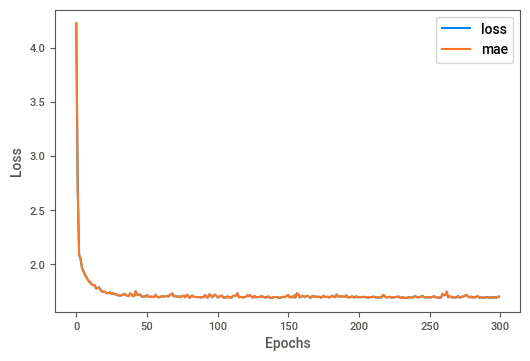

In [60]:
#plot history (Also known as loss  curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

#### Evaluating Model Performance

#### Feature Importance
We will be using ExtraTreesRegressor class for Feature Importance. This class implements a meta estimator that fits a number of randomized decision trees on various samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [61]:
#initializing models and fitting data
etr_model = ExtraTreesRegressor()
etr_model.fit(X, y)
etr_model.feature_importances_

array([0.02797011, 0.011053  , 0.09397685, 0.42299942, 0.01411759,
       0.01028799, 0.        , 0.00525499, 0.00305177, 0.03551958,
       0.00280713, 0.00296888, 0.01335741, 0.00492643, 0.00403297,
       0.00226827, 0.00989475, 0.00441544, 0.00290508, 0.00755409,
       0.02898668, 0.        , 0.05526752, 0.02422242, 0.0391558 ,
       0.        , 0.01765551, 0.06051542, 0.        , 0.03259145,
       0.0127623 , 0.03610247, 0.01265044, 0.00072823, 0.        ])

<AxesSubplot:>

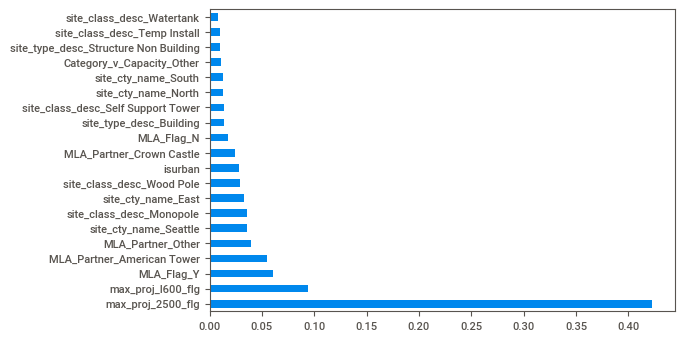

In [62]:
#Top 20 Important features
feature_imp = pd.Series(etr_model.feature_importances_, index = X.columns)
feature_imp.nlargest(20).plot(kind = 'barh')

#### Feature Scaling

In [63]:
#min-max scaling is a better option than Standard Scaler as the data is skewed and does ont follow a normal distribution
scaler_x = MinMaxScaler() #StandardScaler() #QuantileTransformer(output_distribution="uniform")

X_scaled = scaler_x.fit_transform(X)

#### Using Interaction terms in the linear model

In [64]:
#adding interaction terms
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_scaled_poly = poly.fit_transform(X_scaled)

#### Model Design with target scaling

In [65]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer


def pass_func(x):
    return x
pass_transformer = FunctionTransformer(func=pass_func, inverse_func=pass_func)


pos_qt = QuantileTransformer(output_distribution="normal")
def qt_func(x):
    return max(qt.transform(x),0)
def qt_inv(x):
    return max(qt.inverse_transform(x), 0)
pos_qt_transformer = FunctionTransformer(func=pass_func, inverse_func=pass_func)

Cross-validation scores: [1.70991553 2.10326289 2.15052861 1.58192651 1.57156967 1.41776374
 1.73266115 2.46584092 3.19134553 1.53519863]
Average cross-validation score: 1.9460013176233208


<AxesSubplot:xlabel='EC Duration'>

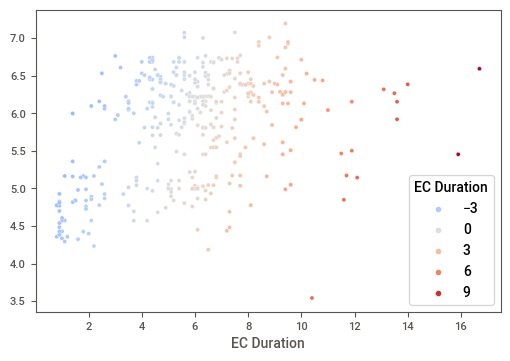

In [66]:
regr_trans = TransformedTargetRegressor(
    regressor=TweedieRegressor(link='log', power=2),
    #regressor=RidgeCV(),
    transformer=pass_transformer
    #transformer=MinMaxScaler()
    #transformer=PowerTransformer(method="box-cox")
    #transformer=QuantileTransformer(output_distribution="uniform")
)

#Cross Validated training and scoring
scores = cross_val_score(regr_trans, X_scaled_poly, y, cv = 10, scoring = make_scorer(mean_absolute_error))
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
y_pred = cross_val_predict(regr_trans, X_scaled_poly, y, cv = 10)
sns.scatterplot(y, y_pred, (y-y_pred), hue_norm=(-10,10), palette="coolwarm")

Cross-validation scores: [1.7786594  1.62113466 1.92188105 1.0625663  1.42752388 1.73090094
 1.9266836  2.50397807 2.90202686 1.35516878]
Average cross-validation score: 1.8230523531482752


<AxesSubplot:xlabel='EC Duration'>

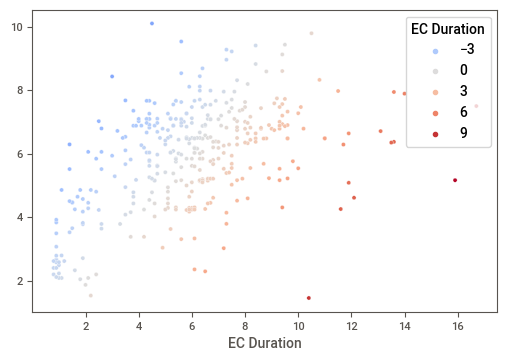

In [67]:
regr_trans = TransformedTargetRegressor(
    #regressor=TweedieRegressor(link='log', power=2),
    regressor=RidgeCV(),
    #transformer=pass_transformer
    #transformer=MinMaxScaler()
    transformer=PowerTransformer()
    #transformer=QuantileTransformer(output_distribution="uniform")
)

#Cross Validated training and scoring
scores = cross_val_score(regr_trans, X_scaled_poly, y, cv = 10, scoring = make_scorer(mean_absolute_error))
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
y_pred = cross_val_predict(regr_trans, X_scaled_poly, y, cv = 10)
sns.scatterplot(y, y_pred, (y-y_pred), hue_norm=(-10,10), palette="coolwarm")

Cross-validation scores: [1.70954791 2.10005315 2.1485843  1.57892978 1.56992173 1.42017792
 1.73385748 2.46467176 3.18927864 1.53449994]
Average cross-validation score: 1.9449522615313666


<AxesSubplot:xlabel='EC Duration'>

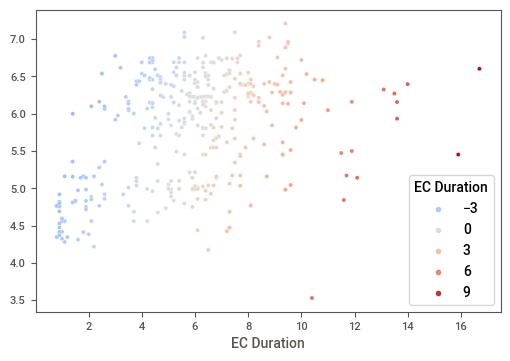

In [68]:
regr_trans = TransformedTargetRegressor(
    regressor=TweedieRegressor(link='log', power=1.99),
    #transformer=MinMaxScaler()
    #transformer=PowerTransformer()
    transformer=pos_qt_transformer
    #transformer=QuantileTransformer(output_distribution="uniform")
)

#Cross Validated training and scoring
scores = cross_val_score(regr_trans, X_scaled_poly, y, cv = 10, scoring = make_scorer(mean_absolute_error))
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
y_pred = cross_val_predict(regr_trans, X_scaled_poly, y, cv = 10)
sns.scatterplot(y, y_pred, (y-y_pred), hue_norm=(-10,10), palette="coolwarm")

Cross-validation scores: [1.76151715 1.86156493 2.12442573 1.30426505 1.47619995 1.49022985
 1.75605268 2.35219846 2.99876022 1.27949882]
Average cross-validation score: 1.8404712828986736


<AxesSubplot:xlabel='EC Duration'>

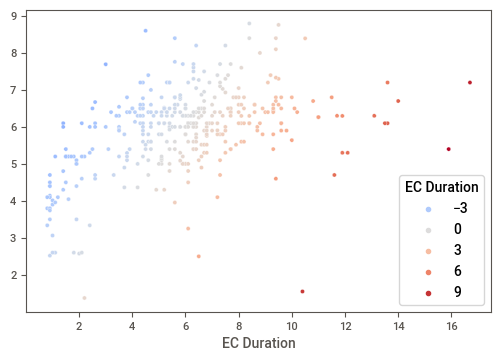

In [69]:
regr_trans = TransformedTargetRegressor(
    #regressor=TweedieRegressor(link='log', power=2),
    regressor=RidgeCV(),
    #transformer=pass_transformer
    #transformer=MinMaxScaler()
    #transformer=PowerTransformer(method="box-cox")
    transformer=QuantileTransformer(output_distribution="uniform")
)

#Cross Validated training and scoring
scores = cross_val_score(regr_trans, X_scaled_poly, y, cv = 10, scoring = make_scorer(mean_absolute_error))
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
y_pred = cross_val_predict(regr_trans, X_scaled_poly, y, cv = 10)
sns.scatterplot(y, y_pred, (y-y_pred), hue_norm=(-10,10), palette="coolwarm")

Cross-validation scores: [1.80253294 1.74049443 1.91497377 1.41599195 1.47884947 1.72595662
 1.97308831 2.21585715 2.7291238  1.47032845]
Average cross-validation score: 1.846719688757947


<AxesSubplot:xlabel='EC Duration'>

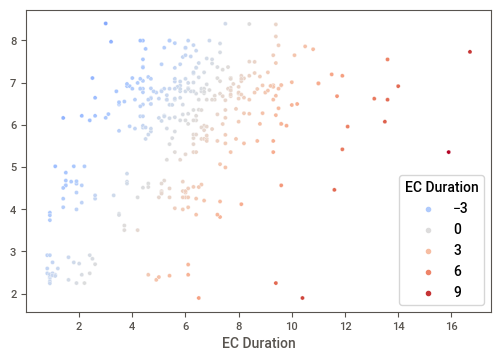

In [70]:
from sklearn.ensemble import RandomForestRegressor
regr_trans = TransformedTargetRegressor(
    #regressor=TweedieRegressor(link='log', power=2),
    regressor=RandomForestRegressor(min_samples_leaf=10),
    #transformer=pass_transformer
    #transformer=MinMaxScaler()
    transformer=PowerTransformer()
    #transformer=QuantileTransformer(output_distribution="uniform")
)

#Cross Validated training and scoring
scores = cross_val_score(regr_trans, X_scaled, y, cv = 10, scoring = make_scorer(mean_absolute_error))
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
y_pred = cross_val_predict(regr_trans, X_scaled, y, cv = 10)
sns.scatterplot(y, y_pred, (y-y_pred), hue_norm=(-10,10), palette="coolwarm")

In [71]:
#creating list of prediction differences
lst = list(abs(y - y_pred))

In [72]:
#looping through to find prediction differences less that or equal to 1.5
count = 0
for i in lst:
    if i <= 1.5:
        count += 1
        
print(count)

187


In [76]:
print('Percentage of predictions around 1.5 months Delta: {}'.format((count/y.shape[0]) * 100))

Percentage of predictions around 1.5 months Delta: 49.47089947089947
